<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_data_multi_delta_(3_6)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_3.6'

In [4]:
os.listdir(base_path)

['data_multi_delta_3.6_n20.csv',
 'data_multi_delta_3.6_n30.csv',
 'data_multi_delta_3.6_n60.csv',
 'data_multi_delta_3.6_n120.csv',
 'data_multi_delta_3.6_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_3.6_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,88.446001,30.772905,67.722714,46.529950,614.171979,857.643549,615.986503,241.657046
1,0.0,1.0,80.929627,89.144406,73.270371,74.749025,-1127.993970,-799.900541,416.725327,-1216.625868
2,0.0,2.0,35.552752,79.330885,82.450846,59.696774,1618.305723,1885.336980,386.070722,1499.266258
3,0.0,3.0,40.392835,85.375301,98.458714,86.434377,-1641.135894,-1320.474668,521.953755,-1842.428423
4,0.0,4.0,86.882254,92.689778,39.495828,52.072062,2149.132818,2430.272740,95.865703,2334.407037
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,86.627521,31.487479,35.317895,70.937705,-880.398416,-646.027816,272.158192,-918.186009
249996,999.0,246.0,46.075932,95.034446,37.896679,43.576156,-2873.041626,-2640.458413,912.316424,-3552.774837
249997,999.0,247.0,52.549205,48.346097,33.142141,65.804075,268.471473,478.312991,464.146241,14.166751
249998,999.0,248.0,26.883832,89.663074,95.095451,55.011409,350.467377,627.121142,495.059776,132.061366


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,88.446001,30.772905,67.722714,46.529950,614.171979,857.643549,615.986503,241.657046
1,0.0,1.0,80.929627,89.144406,73.270371,74.749025,-1127.993970,-799.900541,416.725327,-1216.625868
2,0.0,2.0,35.552752,79.330885,82.450846,59.696774,1618.305723,1885.336980,386.070722,1499.266258
3,0.0,3.0,40.392835,85.375301,98.458714,86.434377,-1641.135894,-1320.474668,521.953755,-1842.428423
4,0.0,4.0,86.882254,92.689778,39.495828,52.072062,2149.132818,2430.272740,95.865703,2334.407037
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,86.627521,31.487479,35.317895,70.937705,-880.398416,-646.027816,272.158192,-918.186009
249996,999.0,246.0,46.075932,95.034446,37.896679,43.576156,-2873.041626,-2640.458413,912.316424,-3552.774837
249997,999.0,247.0,52.549205,48.346097,33.142141,65.804075,268.471473,478.312991,464.146241,14.166751
249998,999.0,248.0,26.883832,89.663074,95.095451,55.011409,350.467377,627.121142,495.059776,132.061366


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    88.446001  30.772905  67.722714  46.529950   614.171979   
      1.0    80.929627  89.144406  73.270371  74.749025 -1127.993970   
      2.0    35.552752  79.330885  82.450846  59.696774  1618.305723   
      3.0    40.392835  85.375301  98.458714  86.434377 -1641.135894   
      4.0    86.882254  92.689778  39.495828  52.072062  2149.132818   
...                ...        ...        ...        ...          ...   
999.0 245.0  86.627521  31.487479  35.317895  70.937705  -880.398416   
      246.0  46.075932  95.034446  37.896679  43.576156 -2873.041626   
      247.0  52.549205  48.346097  33.142141  65.804075   268.471473   
      248.0  26.883832  89.663074  95.095451  55.011409   350.467377   
      249.0  51.072969  84.746894  83.771478  25.158912  2754.698288   

                       Y       y_hat        e_hat  
rep   index                                        
0.0   0.0     857.643549  615.986503   241.657046  
      1.0    -799.900541  416.725327 -1216.625868  
      2.0    1885.336980  386.070722  1499.266258  
      3.0   -1320.474668  521.953755 -1842.428423  
      4.0    2430.272740   95.865703  2334.407037  
...                  ...         ...          ...  
999.0 245.0  -646.027816  272.158192  -918.186009  
      246.0 -2640.458413  912.316424 -3552.774837  
      247.0   478.312991  464.146241    14.166751  
      248.0   627.121142  495.059776   132.061366  
      249.0  3009.448541  520.346202  2489.102339  

[250000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    88.446001  30.772905  67.722714  46.529950   614.171979   
      1.0    80.929627  89.144406  73.270371  74.749025 -1127.993970   
      2.0    35.552752  79.330885  82.450846  59.696774  1618.305723   
      3.0    40.392835  85.375301  98.458714  86.434377 -1641.135894   
      4.0    86.882254  92.689778  39.495828  52.072062  2149.132818   
...                ...        ...        ...        ...          ...   
999.0 245.0  86.627521  31.487479  35.317895  70.937705  -880.398416   
      246.0  46.075932  95.034446  37.896679  43.576156 -2873.041626   
      247.0  52.549205  48.346097  33.142141  65.804075   268.471473   
      248.0  26.883832  89.663074  95.095451  55.011409   350.467377   
      249.0  51.072969  84.746894  83.771478  25.158912  2754.698288   

                       Y       y_hat        e_hat  
rep   index                                        
0.0   0.0     857.643549  615.986503   241.657046  
      1.0    -799.900541  416.725327 -1216.625868  
      2.0    1885.336980  386.070722  1499.266258  
      3.0   -1320.474668  521.953755 -1842.428423  
      4.0    2430.272740   95.865703  2334.407037  
...                  ...         ...          ...  
999.0 245.0  -646.027816  272.158192  -918.186009  
      246.0 -2640.458413  912.316424 -3552.774837  
      247.0   478.312991  464.146241    14.166751  
      248.0   627.121142  495.059776   132.061366  
      249.0  3009.448541  520.346202  2489.102339  

[250000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,88.446001,30.772905,67.722714,46.529950,614.171979,857.643549,615.986503,241.657046
1,0.0,1.0,80.929627,89.144406,73.270371,74.749025,-1127.993970,-799.900541,416.725327,-1216.625868
2,0.0,2.0,35.552752,79.330885,82.450846,59.696774,1618.305723,1885.336980,386.070722,1499.266258
3,0.0,3.0,40.392835,85.375301,98.458714,86.434377,-1641.135894,-1320.474668,521.953755,-1842.428423
4,0.0,4.0,86.882254,92.689778,39.495828,52.072062,2149.132818,2430.272740,95.865703,2334.407037
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,86.627521,31.487479,35.317895,70.937705,-880.398416,-646.027816,272.158192,-918.186009
249996,999.0,246.0,46.075932,95.034446,37.896679,43.576156,-2873.041626,-2640.458413,912.316424,-3552.774837
249997,999.0,247.0,52.549205,48.346097,33.142141,65.804075,268.471473,478.312991,464.146241,14.166751
249998,999.0,248.0,26.883832,89.663074,95.095451,55.011409,350.467377,627.121142,495.059776,132.061366


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    88.446001  30.772905  67.722714  46.529950   614.171979   
      1.0    80.929627  89.144406  73.270371  74.749025 -1127.993970   
      2.0    35.552752  79.330885  82.450846  59.696774  1618.305723   
      3.0    40.392835  85.375301  98.458714  86.434377 -1641.135894   
      4.0    86.882254  92.689778  39.495828  52.072062  2149.132818   
...                ...        ...        ...        ...          ...   
999.0 245.0  86.627521  31.487479  35.317895  70.937705  -880.398416   
      246.0  46.075932  95.034446  37.896679  43.576156 -2873.041626   
      247.0  52.549205  48.346097  33.142141  65.804075   268.471473   
      248.0  26.883832  89.663074  95.095451  55.011409   350.467377   
      249.0  51.072969  84.746894  83.771478  25.158912  2754.698288   

                       Y       y_hat        e_hat  
rep   index                                        
0.0   0.0     857.643549  615.986503   241.657046  
      1.0    -799.900541  416.725327 -1216.625868  
      2.0    1885.336980  386.070722  1499.266258  
      3.0   -1320.474668  521.953755 -1842.428423  
      4.0    2430.272740   95.865703  2334.407037  
...                  ...         ...          ...  
999.0 245.0  -646.027816  272.158192  -918.186009  
      246.0 -2640.458413  912.316424 -3552.774837  
      247.0   478.312991  464.146241    14.166751  
      248.0   627.121142  495.059776   132.061366  
      249.0  3009.448541  520.346202  2489.102339  

[250000 rows x 8 columns]

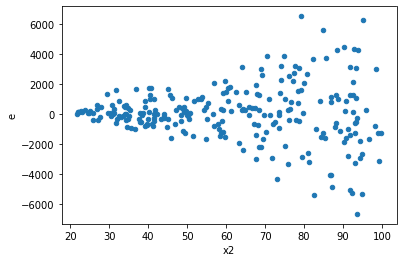

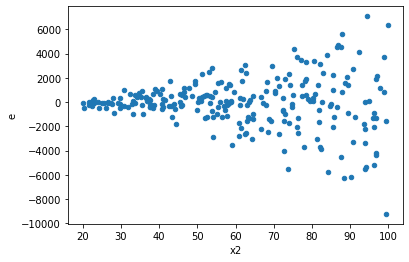

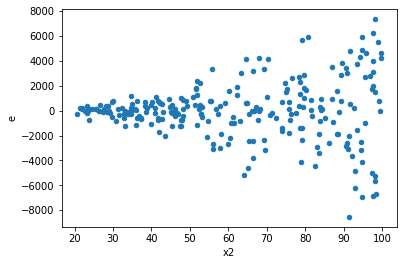

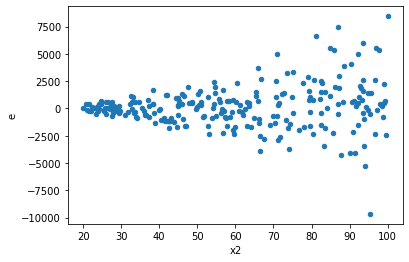

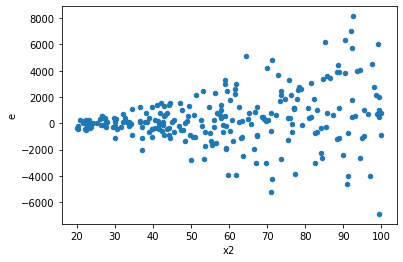

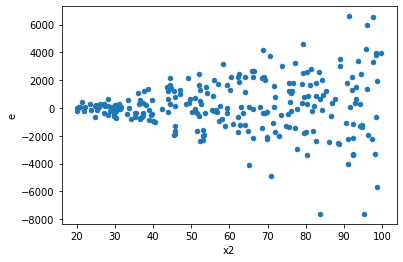

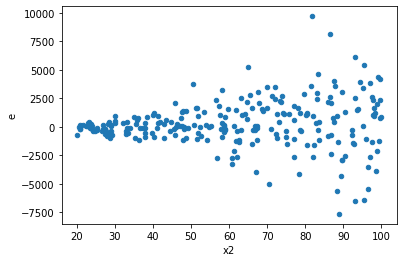

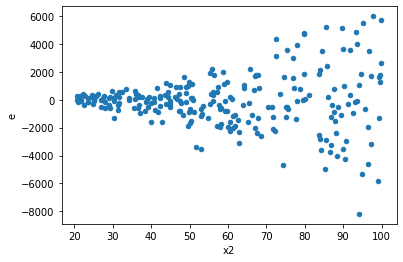

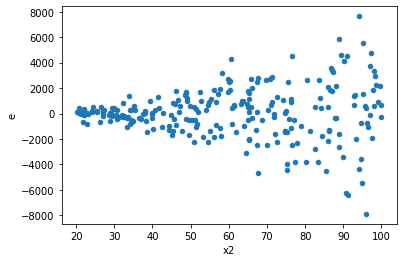

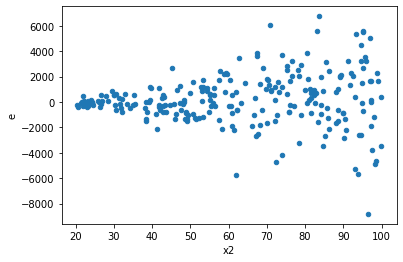

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,96.0,96.0,44752864.71969257,699164892.5168027,466175.6741634643,7282967.630383361,15.622796370600822,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
1.0,96.0,96.0,50478653.39684995,884894283.9212614,525819.306217187,9217648.790846473,17.530069135649367,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
2.0,96.0,96.0,48011555.863590956,1053971829.9471318,500120.3735790725,10978873.228615956,21.95246146452004,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
3.0,96.0,96.0,56173788.03355503,817840740.3136122,585143.6253495315,8519174.378266795,14.559116786375181,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
4.0,96.0,96.0,43426008.570794545,729045284.0260208,452354.25594577653,7594221.708604383,16.788217660794373,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
5.0,96.0,96.0,67531931.69773367,687213809.9964541,703457.6218513924,7158477.187463064,10.17613139029335,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
6.0,96.0,96.0,54608901.12390128,863513306.8206055,568842.7200406383,8994930.279381307,15.812684178745762,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
7.0,96.0,96.0,32274192.98391175,775739609.3655655,336189.5102490807,8080620.930891308,24.0359103557527,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
8.0,96.0,96.0,52891137.05543137,798186115.0615731,550949.3443274101,8314438.698558054,15.091112793151943,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,96.0,96.0,44752864.71969257,699164892.5168027,466175.6741634643,7282967.630383361,15.622796370600822,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
1.0,96.0,96.0,50478653.39684995,884894283.9212614,525819.306217187,9217648.790846473,17.530069135649367,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
2.0,96.0,96.0,48011555.863590956,1053971829.9471318,500120.3735790725,10978873.228615956,21.95246146452004,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
3.0,96.0,96.0,56173788.03355503,817840740.3136122,585143.6253495315,8519174.378266795,14.559116786375181,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
4.0,96.0,96.0,43426008.570794545,729045284.0260208,452354.25594577653,7594221.708604383,16.788217660794373,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
5.0,96.0,96.0,67531931.69773367,687213809.9964541,703457.6218513924,7158477.187463064,10.17613139029335,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
6.0,96.0,96.0,54608901.12390128,863513306.8206055,568842.7200406383,8994930.279381307,15.812684178745762,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
7.0,96.0,96.0,32274192.98391175,775739609.3655655,336189.5102490807,8080620.930891308,24.0359103557527,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
8.0,96.0,96.0,52891137.05543137,798186115.0615731,550949.3443274101,8314438.698558054,15.091112793151943,2.220446049250313e-16,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64